In [1]:
"""using nographs + graphviz for program environment inspection"""
from functools import wraps, update_wrapper
from ctypes    import cast, py_object
from graphviz  import Digraph
import nographs as nog
# http://magjac.com/graphviz-visual-editor/

In [2]:
dict_1= {0:{1,2,4}, 1:[3,3,3,5], 2:{3,6}, 3:{37}, 37:{7}, 4:{5,6}, 5:{57}, 57:{7},
         6:{67}, 67:{7}, 7:{} }
dict_1= {0:{111,2,4}, 111:{3,5}, 2:{3,6}, 3:{37}, 37:{7}, 4:{5,6}, 5:{57}, 57:{7}, 
         6:{67}, 67:{7}, 7:{77,777}, 77:{}, 777:{}, 1:{777} }

In [3]:
node_style =dict( style='filled', shape='box', 
                                align='left',
                                fontsize='12',
                                ranksep='0.01',
                                height='0.02',width='0.04',)
gr_style = dict( linelength="16",rankdir='LR',size='16,8',
                # concentrate='true'
               )#landscape="True",splines='curved' ,layout="neato"

def adapter_graphviz( wrapped ):
    """translation to GraphViz visitor"""
    dot = Digraph( node_attr = node_style, graph_attr = gr_style, )
    @wraps( wrapped )
    def wrapper_bg( vert, _trav ):
        dot.node( str(vert), str(vert) )
        for result in wrapped(vert, _trav):
            dot.edge( str(vert), str(result), )# label=f"{str(x)}-{str(result)}",
            yield result
    wrapper_bg.dot = dot
    return wrapper_bg


In [4]:
class concentrate_edges:
    # pylint: disable=no-member   #(__wrapped__)
    """identity morpher for start"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    def __call__(self, vert, _trav):
        yield from set(self.__wrapped__( vert, _trav ))

In [5]:
class concentrate_edges:
    # pylint: disable=no-member   #(__wrapped__)
    """identity morpher for start"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    def __call__(self, vert, _trav):
        yield from set(self.__wrapped__( vert, _trav ))

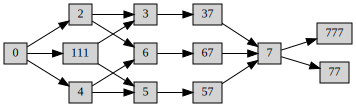

In [6]:
def graph_inspect( obj, forward ):
    trav_forward = nog.TraversalBreadthFirst( forward )
    trav_forward.start_from( obj, build_paths=True )
    for _, _ in zip(trav_forward, range(300)):
        pass
        # str( list(trav_forward) )
    graph_inspect.trav_forward = trav_forward
    return forward

@adapter_graphviz
@concentrate_edges
def pure(vert, _):
    """basic `next vertices`"""
    yield from dict_1[vert]
    
graph_inspect( 0, pure ).dot

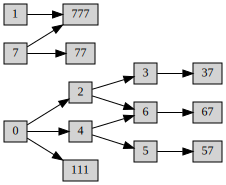

In [7]:
class DressCovariant:
    # pylint: disable=no-member   #(__wrapped__)
    """morpher for node names base"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    @staticmethod
    def dress( vert,):
        return vert % 10
    def __call__(self, vert, _trav):
        # yield from map( self.dress, self.__wrapped__( self.undress(vert), _trav ) )
        # yield from                   self.__wrapped__( self.dress(vert), _trav )
        yield from map( self.dress, self.__wrapped__(              vert , _trav ) )

@DressCovariant
@adapter_graphviz
def covar_outside(vert, _):
    """basic `next vertices`"""
    yield from dict_1[vert]

graph_inspect( 0, covar_outside ).dot

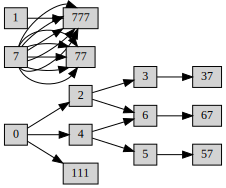

In [8]:
class DressContravariant:
    # pylint: disable=no-member   #(__wrapped__)
    """morpher for node names base"""
    def __init__(self, wrapped):
        update_wrapper(self, wrapped )
    @staticmethod
    def dress( vert,):
        return vert % 10
    def __call__(self, vert, _trav):
        yield from                   self.__wrapped__( self.dress(vert), _trav )

@DressContravariant
@adapter_graphviz
def contravar_outside(vert, _):
    """basic `next vertices`"""
    yield from dict_1[vert]

graph_inspect( 0, contravar_outside ).dot

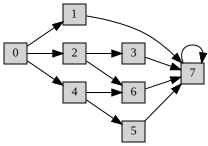

In [11]:
@adapter_graphviz
@concentrate_edges
@DressCovariant
def covar_inside(vert, _):
    """basic `next vertices`"""
    yield from dict_1[vert]

graph_inspect( 0, covar_inside ).dot

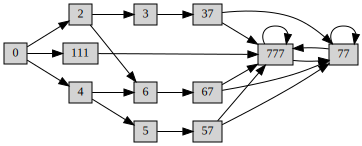

In [10]:
@adapter_graphviz
@DressContravariant
def contravar_inside(vert, _):
    """basic `next vertices`"""
    yield from dict_1[vert]

graph_inspect( 0, contravar_inside ).dot